In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('data/moviereviews.csv')

In [12]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [13]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [16]:
s = ""

In [17]:
s.isspace()

False

In [18]:
df[~df['review'].str.isspace()]

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [19]:
df['review'].apply(lambda review: review=='')

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 1965, dtype: bool

In [20]:
df['review'].apply(lambda review: review=='').sum()

0

In [21]:
#Okay no worries with '' type review


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [23]:
df['label'].value_counts()

neg    983
pos    982
Name: label, dtype: int64

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer(stop_words='english')

matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


In [27]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [29]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [30]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [31]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [32]:
preds = pipe.predict(X_test)

In [33]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.82      0.83      0.83       188
         pos       0.84      0.83      0.84       205

    accuracy                           0.83       393
   macro avg       0.83      0.83      0.83       393
weighted avg       0.83      0.83      0.83       393



c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


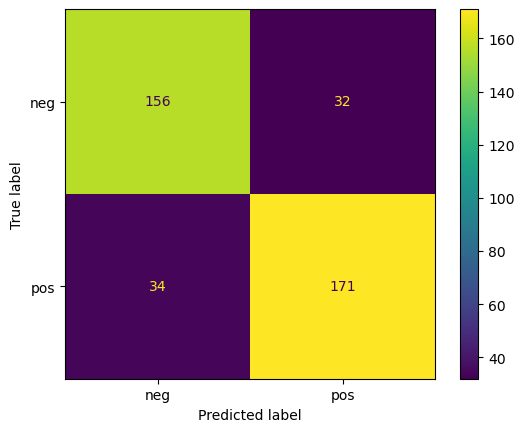

In [34]:
plot_confusion_matrix(pipe,X_test,y_test)